# <span style="color:navy"> Introduction


In this notebook we will crawl 10-K from SEC, extract item 1 in 10-K and using PCA learned model to give three different scores for this company.

# <span style="color:navy"> STEP 5 : Counting Word Patterns in Item1 Using Regular Expressions
Below the word lists:
    
* **Strategic positioning**: differenti\*, unique\*, superior\*, premium\*, excellen\*, leading edge, upscale, high\* price\*,
high\* margin\*, high\* end\*, inelasticity\*, cost leader\*, low\* pric\*, low\* cost\*, cost advantage\*, competitive
pric\*, aggressive pric\*
* **Operations**: efficien\*, high\* yield\*, process\* improvement\*, asset\* utilization\*, capacity\* utilization\*, scope\*,
scale\*, breath\*, broad, mass, high\* volume\*, large\* volume\*, economy\* of scale, new\* product\*, quality\*,
reliab\*, durable\*
* **Marketing**: marketing\*, advertis\*, brand\*, reputation\*, trademark\*
* **Service**: customer\* service\*, consumer\* service\*, customer\* need\*, sales support\*, post-purchase service\*,
customer\* preference\*, consumer\* preference\*, consumer\* relation\*, consumer\* experience\*, consumer\*
support\*, loyalty\*, customiz\*, tailor\*, personaliz\*, responsive\*, on time, timely
* **Technology**: innovate\*, creativ\*, research and development, R&D, techni*, technolog\*, patent\*, proprietar\*
* **Infrastructure**: control\* cost\*, control\* expense\*, control\* overhead\*, minimiz\* cost\*, minimiz\* expense\*,
minimiz\* overhead\*, reduce\* cost\*, reduce\* expense\*, reduce\* overhead\*, cut\* cost\*, cut\* expense\*, cut\*
overhead\*, decreas\* cost\*, decreas\* expense\*, decreas\* overhead\*, monitor\* cost\*, monitor\* expense\*,
monitor\* overhead\*, sav\* cost\*, sav\* expense\*, sav\* overhead\*, cost\* control\*, cost\* minimization\*, cost\*
reduction\*, cost\* saving\*, cost\* improvement\*, expense\* control\*, expense\* minimization\*, expense\*
reduction\*, expense\* saving\*, expense\* improvement\*, overhead\* control\*, overhead\* minimization\*,
overhead\* reduction\*, overhead\* saving\*, overhead\* improvement\*    
* **Human resources management**: talent\*, train\*, skill\*, intellectual propert\*, human capital\*

In [63]:
import re

regexes = [
	"\\bdifferenti\w*\\b",
	"\\bunique\w*\\b",
	"\\bsuperior\w*\\b",
	"\\bpremium\w*\\b",
	"\\bexcellen\w*\\b",
	"\\bleading\s+edge\\b",
	"\\bupscale\\b",
	"\\bhigh\w*\s+price\w*\\b",
	"\\bhigh\w*\s+margin\w*\\b",
	"\\bhigh\w*\s+end\w*\\b",
	"\\binelasticity\w*\\b",
	"\\bcost\s+leader\w*\\b",
	"\\blow\w*\s+pric\w*\\b",
	"\\blow\w*\s+cost\w*\\b",
	"\\bcost\s+advantage\w*\\b",
	"\\bcompetitive\s+pric\w*\\b",
	"\\baggressive\s+pric\w*\\b",
	"\\befficien\w*\\b",
	"\\bhigh\w*\s+yield\w*\\b",
	"\\bprocess\w*\s+improvement\w*\\b",
	"\\basset\w*\s+utilization\w*\\b",
	"\\bcapacity\w*\s+utilization\w*\\b",
	"\\bscope\w*\\b",
	"\\bscale\w*\\b",
	"\\bbreath\w*\\b",
	"\\bbroad\\b",
	"\\bmass\\b",
	"\\bhigh\w*\s+volume\w*\\b",
	"\\blarge\w*\s+volume\w*\\b",
	"\\beconomy\w*\s+of\s+scale\\b",
	"\\bnew\w*\s+product\w*\\b",
	"\\bquality\w*\\b",
	"\\breliab\w*\\b",
	"\\bdurable\w*\\b",
	"\\bmarketing\w*\\b",
	"\\badvertis\w*\\b",
	"\\bbrand\w*\\b",
	"\\breputation\w*\\b",
	"\\btrademark\w*\\b",
	"\\bcustomer\w*\s+service\w*\\b",
	"\\bconsumer\w*\s+service\w*\\b",
	"\\bcustomer\w*\s+need\w*\\b",
	"\\bsales\s+support\w*\\b",
	"\\bpost-purchase\s+service\w*\\b",
	"\\bcustomer\w*\s+preference\w*\\b",
	"\\bconsumer\w*\s+preference\w*\\b",
	"\\bconsumer\w*\s+relation\w*\\b",
	"\\bconsumer\w*\s+experience\w*\\b",
	"\\bconsumer\w*\s+support\w*\\b",
	"\\bloyalty\w*\\b",
	"\\bcustomiz\w*\\b",
	"\\btailor\w*\\b",
	"\\bpersonaliz\w*\\b",
	"\\bresponsive\w*\\b",
	"\\bon\s+time\\b",
	"\\btimely\\b",
	"\\binnovate\w*\\b",
	"\\bcreativ\w*\\b",
	"\\bresearch\s+and\s+development\\b",
	"\\br&d\\b",
	"\\btechni\w*\\b",
	"\\btechnolog\w*\\b",
	"\\bpatent\w*\\b",
	"\\bproprietar\w*\\b",
	"\\bcontrol\w*\s+cost\w*\\b",
	"\\bcontrol\w*\s+expense\w*\\b",
	"\\bcontrol\w*\s+overhead\w*\\b",
	"\\bminimiz\w*\s+cost\w*\\b",
	"\\bminimiz\w*\s+expense\w*\\b",
	"\\bminimiz\w*\s+overhead\w*\\b",
	"\\breduce\w*\s+cost\w*\\b",
	"\\breduce\w*\s+expense\w*\\b",
	"\\breduce\w*\s+overhead\w*\\b",
	"\\bcut\w*\s+cost\w*\\b",
	"\\bcut\w*\s+expense\w*\\b",
	"\\bcut\w*\s+overhead\w*\\b",
	"\\bdecreas\w*\s+cost\w*\\b",
	"\\bdecreas\w*\s+expense\w*\\b",
	"\\bdecreas\w*\s+overhead\w*\\b",
	"\\bmonitor\w*\s+cost\w*\\b",
	"\\bmonitor\w*\s+expense\w*\\b",
	"\\bmonitor\w*\s+overhead\w*\\b",
	"\\bsav\w*\s+cost\w*\\b",
	"\\bsav\w*\s+expense\w*\\b",
	"\\bsav\w*\s+overhead\w*\\b",
	"\\bcost\w*\s+control\w*\\b",
	"\\bcost\w*\s+minimization\w*\\b",
	"\\bcost\w*\s+reduction\w*\\b",
	"\\bcost\w*\s+saving\w*\\b",
	"\\bcost\w*\s+improvement\w*\\b",
	"\\bexpense\w*\s+control\w*\\b",
	"\\bexpense\w*\s+minimization\w*\\b",
	"\\bexpense\w*\s+reduction\w*\\b",
	"\\bexpense\w*\s+saving\w*\\b",
	"\\bexpense\w*\s+improvement\w*\\b",
	"\\boverhead\w*\s+control\w*\\b",
	"\\boverhead\w*\s+minimization\w*\\b",
	"\\boverhead\w*\s+reduction\w*\\b",
	"\\boverhead\w*\s+saving\w*\\b",
	"\\boverhead\w*\s+improvement\w*\\b",
	"\\btalent\w*\\b",
	"\\btrain\w*\\b",
	"\\bskill\w*\\b",
	"\\bintellectual\s+propert\w*\\b",
	"\\bhuman\s+capital\w*\\b",
	]


wordRegExpressions = []
for str in regexes:
    wordRegExpressions.append(re.compile(r"{}".format(str)))

# Categories of these words
categories = ["Strategic positioning","Operations","Marketing","Service","Technology","Infrastructure","Human resources management"]
category_index = [0,16, 33, 38, 55, 63, 99, 104]

# Extract word freqency from item1 text as a string
def extract_word_freq(item1_text):
    #convert to lower cases and strip all new lines
    item1_string_text = item1_text.lower().replace('\n', " ")
    item1_total_words = len(item1_string_text.split())

    #word_counts is an array of word counts for each word pattern
    word_counts = []
    word_freq   = []
    for regWord in wordRegExpressions:
        #get number of matches per word pattern
        matches = len(re.findall(regWord, item1_string_text))
        word_counts.append(matches)
        word_freq.append(matches/item1_total_words * 100)
    
    return word_counts, word_freq

# Extract category freqency from item1 text as a string
def extract_category_freq(item1_text):
    #convert to lower cases and strip all new lines
    item1_string_text = item1_text.lower().replace('\n', " ")
    item1_total_words = len(item1_string_text.split())

    #word_counts is an array of word counts for each word pattern
    word_counts = []
    for regWord in wordRegExpressions:
        #get number of matches per word pattern
        matches = len(re.findall(regWord, item1_string_text))
        word_counts.append(matches)
        
    category_sum = []
    category_freq = []

    #sum the word counts in each category 
    for i in range(len(categories)):
        category_total = sum(word_counts[category_index[i]:category_index[i+1]+1])
        category_sum.append(category_total)
        category_freq.append(category_total/item1_total_words * 100)
    
    return category_sum, category_freq

As we have compiled a list of word patterns. We will use regular expression matches to look for counts of these word patterns in item1.

In [32]:
category_sum, category_freq = extract_category_freq(item1_text)

print("category sum:", category_sum)
print("category freq:", category_freq)

category sum: [9, 38, 30, 11, 62, 0, 26]
category freq: [0.0008378328058089741, 0.003537516291193446, 0.002792776019363247, 0.0010240178737665239, 0.005771737106684044, 0.0, 0.0024204058834481476]


<b> Use Pandas Dataframe to Print Word Counts in Each Category(optional)</b>  
In python jupyter notebook, we can use pandas datafram library to print the category counts in a tabular way.

In [33]:
df_category = pd.DataFrame([categories[i], category_sum[i], category_freq[i] ] for i in range(len(categories)))

df_category.columns = ['Category', 'Count', 'Frequency']
df_category

,Category,Count,Frequency
0,Strategic positioning,9,0.000838
1,Operations,38,0.003538
2,Marketing,30,0.002793
3,Service,11,0.001024
4,Technology,62,0.005772
5,Infrastructure,0,0.000000
6,Human resources management,26,0.002420


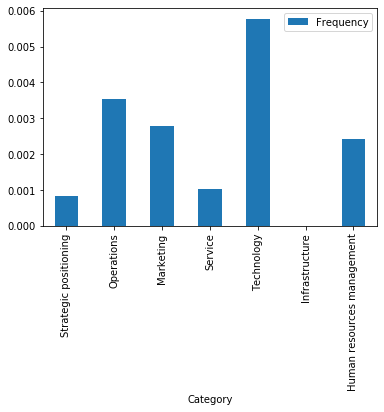

In [38]:
import matplotlib.pyplot as plt
df_category.plot(x ='Category', y='Frequency', kind = 'bar')
plt.show()

<b> Use Pandas Dataframe to Print Word Counts(optional)</b>  
In python jupyter notebook, we can use pandas datafram library to print the word counts in a tabular way.

In [34]:
word_counts, word_freq = extract_word_freq(item1_text)

df_word_counts = pd.DataFrame([regexes[i], word_counts[i], word_freq[i]] for i in range(len(wordRegExpressions)))

df_word_counts.columns = ['Regular Expression for Word Pattern', 'Count', 'Frequency']
pd.set_option('display.max_rows', 120)
df_word_counts

,Regular Expression for Word Pattern,Count,Frequency
0,\bdifferenti\w*\b,0,0.000000
1,\bunique\w*\b,3,0.000279
2,\bsuperior\w*\b,0,0.000000
3,\bpremium\w*\b,0,0.000000
4,\bexcellen\w*\b,0,0.000000
5,\bleading\s+edge\b,0,0.000000
6,\bupscale\b,0,0.000000
7,\bhigh\w*\s+price\w*\b,0,0.000000
8,\bhigh\w*\s+margin\w*\b,0,0.000000
9,\bhigh\w*\s+end\w*\b,0,0.000000


## Machine Learning Using PCA

0000320193-19-000119.txt


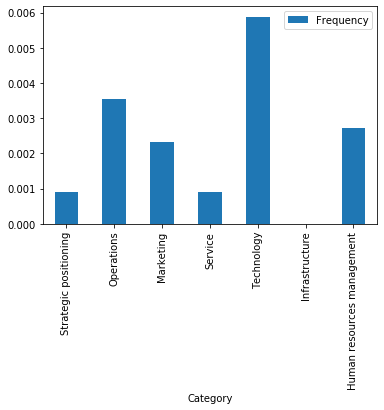

0001628280-16-020309.txt


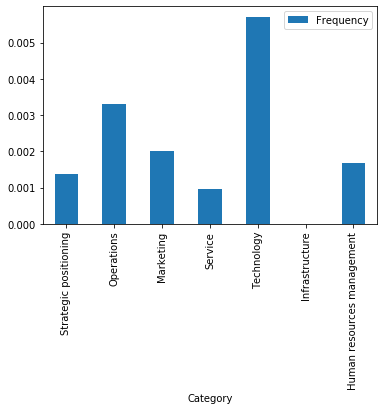

0000320193-17-000070.txt


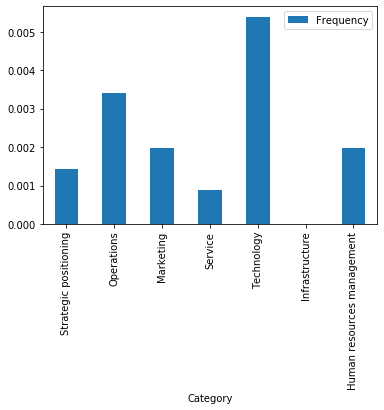

0001193125-10-238044.txt


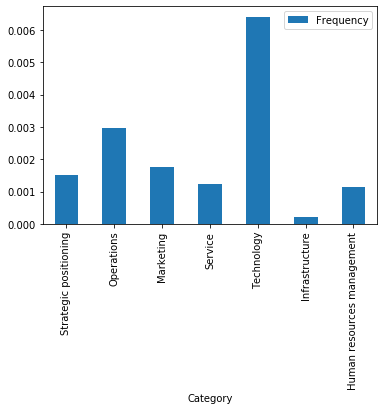

0001193125-14-383437.txt


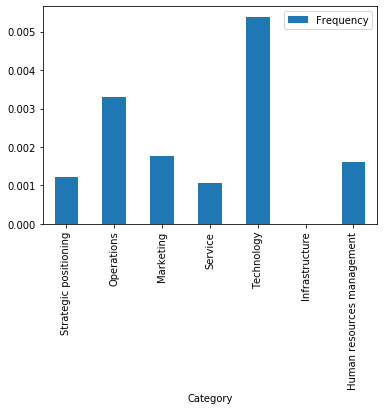

0001104659-05-058421.txt


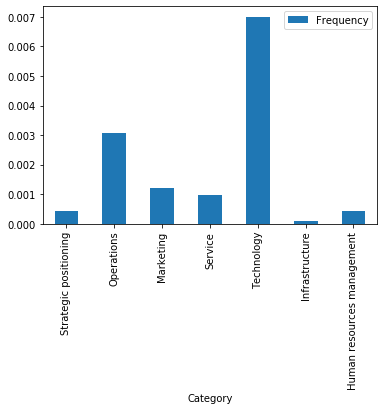

0001193125-11-282113.txt


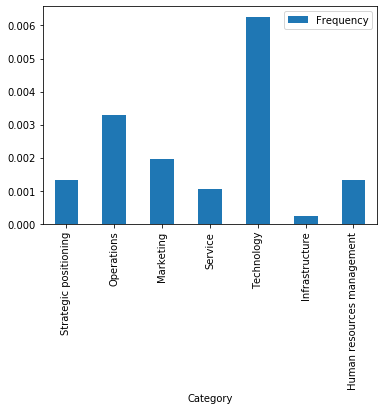

0001193125-09-214859.txt


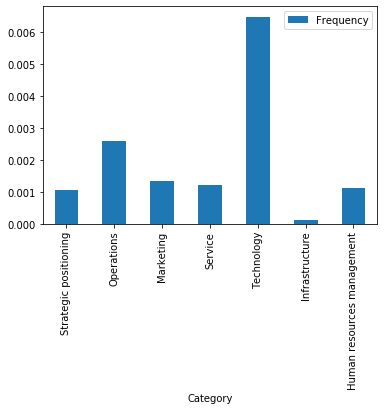

0000912057-00-053623.txt


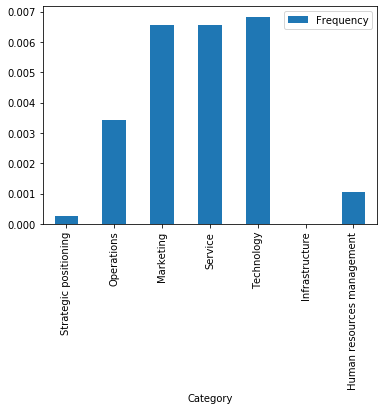

0001193125-12-444068.txt


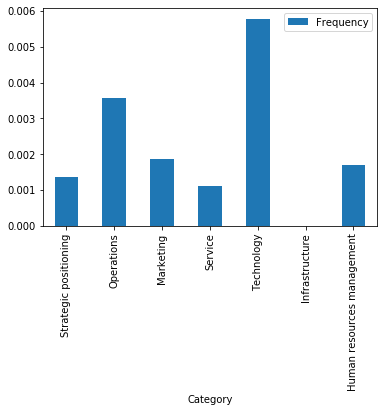

0001193125-08-224958.txt


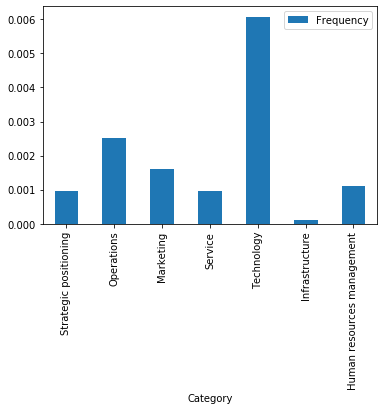

0001193125-15-356351.txt


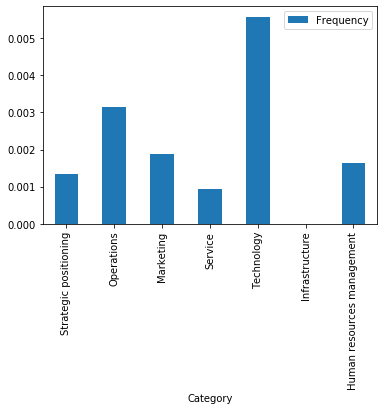

0000320193-20-000096.txt


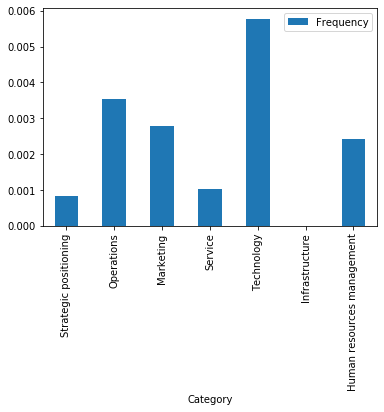

0000320193-18-000145.txt


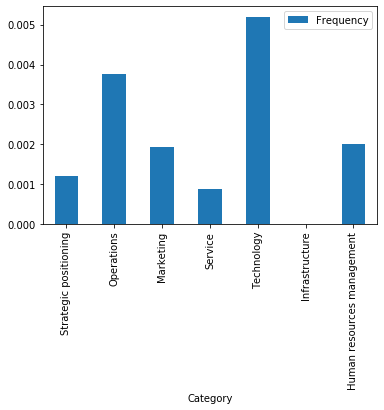

0001193125-13-416534.txt


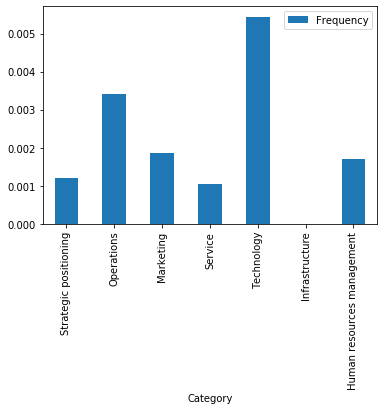

0001104659-06-084288.txt


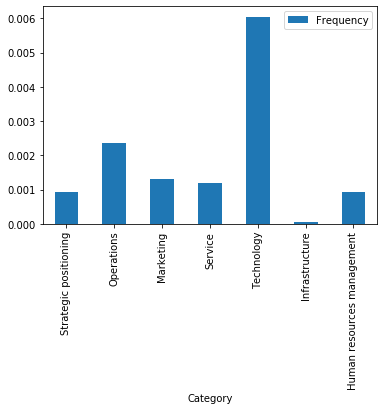

In [43]:
import os

#local directory where all item1 are located
working_dir = '../item1/'
#ticker
ticker = 'AAPL'


files = os.listdir(working_dir + ticker)
for file in files:
    print(file)
    item1_text = open(working_dir + ticker + '/' + file,'r').read()
    category_sum, category_freq = extract_category_freq(item1_text)
    #print("category sum:", category_sum)
    #print("category freq:", category_freq)
    df_category = pd.DataFrame([categories[i], category_freq[i] ] for i in range(len(categories)))
    df_category.columns = ['Category', 'Frequency']
    df_category.plot(x ='Category', y='Frequency', kind = 'bar')
    plt.show()
    

In [78]:
#create coluns for word0 ... word104
cols = ['w{}'.format(i) for i in range(105)]
cols = ['ticker', 'id'] + cols
df = pd.DataFrame(columns=cols)

tickers = os.listdir(working_dir)
i = 0
for ticker in tickers:
    print(ticker)
    files = os.listdir(working_dir + ticker)
    for file in files:
        #print(file)
        item1_text = open(working_dir + ticker + '/' + file,'r').read()
        #discard item1 less than 1000 words
        if len(item1_text.split()) < 1000:
            continue
        word_counts, word_freq = extract_word_freq(item1_text)
        new_row = [ticker, file[:-4]] + word_freq
        #print(new_row)
        df.loc[i] = new_row
        i += 1
  
df.to_csv('training.csv')
df

LANC
MRTX
INOV
CTAS
CDE
VZ
GME
ADES
CYRX
MGY
CTMX
NVST
AMZN
MESA
PD
GNPX
CELH
DXC
ROG
FARM
DRQ
CMCO
RCL
TGNA
KNSA
HEAR
RMTI
SYRS
CAT
SCOR
SB
VERU
ATRI
MAN
AAPL
PANW
VTVT
ZNGA
LOGC
PM
KHC
CECE
PRLB
AAP
CDK
SRNE
MTRX
DENN
CMCSA
GRMN
CSWI
VKTX
GALT
ICUI
PINS
XPEL
DOMO
XENT
NMRD
CKH
AXTI
SAIA
WIFI
THRM
TENB
ANET
TPIC
ADS
CAH
AMN
AHCO
NRC
APTX
CVNA
CMC
SYX
LRN
HCHC
CNK
UI
SP
VSEC
TOL
ZM
STNG
ADT
ABM
IAA
NSCO
MKSI
PODD
ANF
CRMT
CMD
AGYS
IRWD
FSLR
ATXI
PNRG
SPB
FBHS
CRBP
PXLW
NSIT
ENR
HOME
BMRN
MDC
GBT
PFE
MHH
ELOX
KRMD
TFX
APTV
SSD
PANL
SPNS
ASGN
OMER
AAL
OSTK
CDW
AOSL
MASI
MAR
VRSN
OMCL
ABC
QTWO
SVMK
UBER
MHO
VERI
TMHC
SPGI
GOLF
NNBR
ATRO
ZIXI
GRBK
MSGE
IMVT
SSTK
ALLE
IIVI
SYK
TCS
CMP
PK
HMHC
GDP
MPWR
TCDA
CBT
DXCM
ODT
YUMC
WSC
PTEN
CHUY
LMNR
MNOV
CNX
KMT
OMI
RLGT
PEP
SNPS
GKOS
CBZ
MDP
MMM
ALLK
SWTX
ANIP
HIBB
CHH
STAY
RCM
EMN
ALCO
TREX
ATRA
AXTA
HRI
AVTR
XLRN
BF.B
VIE
SAFM
BERY
GNK
RES
SELB
SRDX
GIII
SM
ADI
SSP
CEIX
CAR
UVV
GWRE
HROW
EXTN
WSM
KVHI
NTUS
QTRX
CNSL
CALA
ARWR
NXST
HWM
ALEC
MAS


,ticker,id,w0,w1,w2,w3,w4,w5,w6,w7,...,w95,w96,w97,w98,w99,w100,w101,w102,w103,w104
0,LANC,0000950152-04-006825,0.000000,0.000000,0.000000,0.055679,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,LANC,0000057515-15-000021,0.013390,0.000000,0.000000,0.026781,0.0,0.0,0.0,0.013390,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.013390,0.040171,0.000000
2,LANC,0000950152-05-007599,0.000000,0.000000,0.000000,0.055036,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,LANC,0000057515-18-000020,0.012771,0.000000,0.000000,0.012771,0.0,0.0,0.0,0.012771,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.012771,0.063857,0.000000
4,LANC,0000950152-06-007520,0.000000,0.000000,0.000000,0.025714,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.025714,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,W,0001214659-21-002594,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
23516,W,0001206774-19-003357,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
23517,W,0001062993-19-003762,0.000000,0.000000,0.023680,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.023680,0.000000
23518,W,0001062993-20-004661,0.000000,0.000000,0.022007,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.022007,0.000000


In [46]:
from sklearn.preprocessing import StandardScaler


import pandas as pd
df = pd.read_csv('training.csv', sep = ',')

# Separating out the features
features = ['w{}'.format(i) for i in range(105)]
x = df.loc[:, features] 

# Standardizing the features
#x = StandardScaler().fit_transform(x)
#x


In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)

pca_df = pd.DataFrame(data = pca_result, columns = ['pc1', 'pc2', 'pc3'])

print(pca_df.head())

        pc1       pc2       pc3
0 -0.377234  0.633358  0.097777
1 -0.300550  0.416751 -0.084883
2 -0.356565  0.580825  0.101875
3 -0.258516  0.361311 -0.072067
4 -0.277047  0.224265  0.064605


In [48]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32508217 0.18670239 0.15863466]


In [52]:
pdPCA = pd.DataFrame(pca.components_,columns=x.columns,index = ['pc1', 'pc2', 'pc3'])
print(pdPCA)

           w0        w1        w2        w3        w4        w5        w6  \
pc1  0.004461  0.005485  0.007614 -0.026168 -0.001828  0.000811 -0.004432   
pc2  0.011483  0.015836  0.004421  0.014221  0.001511 -0.000094  0.004726   
pc3 -0.014589 -0.017753 -0.003626 -0.004902 -0.008119 -0.001399 -0.000492   

           w7        w8        w9  ...           w95  w96       w97  \
pc1 -0.002832 -0.001592 -0.000019  ... -2.733124e-06 -0.0 -0.000051   
pc2 -0.000092  0.001838  0.000725  ... -5.026962e-06  0.0  0.000089   
pc3 -0.000316 -0.002320 -0.000546  ...  3.150101e-07 -0.0 -0.000049   

              w98  w99      w100      w101      w102      w103      w104  
pc1 -1.847949e-06 -0.0 -0.003219 -0.016063  0.001207  0.139275 -0.000672  
pc2  3.349414e-07  0.0  0.003491 -0.011501 -0.010700  0.102498 -0.001031  
pc3 -2.518795e-07 -0.0 -0.016921 -0.049108 -0.025749  0.013151 -0.003034  

[3 rows x 105 columns]
